In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
 from google.colab import drive
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_train = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_train.csv')
data_test = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_test.csv')

In [4]:
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [6]:
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [7]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))

In [9]:
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
cnn4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        1

In [11]:

history4 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
188/188 [==============================] - 38s 43ms/step - loss: 1.1091 - accuracy: 0.6430 - val_loss: 2.9761 - val_accuracy: 0.2208
Epoch 2/10
188/188 [==============================] - 7s 37ms/step - loss: 0.4675 - accuracy: 0.8338 - val_loss: 1.5444 - val_accuracy: 0.5565
Epoch 3/10
188/188 [==============================] - 7s 37ms/step - loss: 0.3798 - accuracy: 0.8636 - val_loss: 0.4037 - val_accuracy: 0.8508
Epoch 4/10
188/188 [==============================] - 7s 37ms/step - loss: 0.3339 - accuracy: 0.8829 - val_loss: 0.2816 - val_accuracy: 0.8930
Epoch 5/10
188/188 [==============================] - 7s 37ms/step - loss: 0.2998 - accuracy: 0.8929 - val_loss: 0.2871 - val_accuracy: 0.8948
Epoch 6/10
188/188 [==============================] - 7s 37ms/step - loss: 0.2889 - accuracy: 0.8963 - val_loss: 0.2631 - val_accuracy: 0.9061
Epoch 7/10
188/188 [==============================] - 7s 37ms/step - loss: 0.2633 - accuracy: 0.9047 - val_loss: 0.2520 - val_accuracy: 0.906

In [12]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.2338666021823883
Test accuracy: 0.9150999784469604


In [13]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [14]:
history4 = cnn4.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
187/187 [==============================] - 26s 136ms/step - loss: 0.4020 - accuracy: 0.8537 - val_loss: 0.3429 - val_accuracy: 0.8723
Epoch 2/50
187/187 [==============================] - 25s 135ms/step - loss: 0.3662 - accuracy: 0.8662 - val_loss: 0.3795 - val_accuracy: 0.8637
Epoch 3/50
187/187 [==============================] - 26s 137ms/step - loss: 0.3445 - accuracy: 0.8728 - val_loss: 0.3139 - val_accuracy: 0.8837
Epoch 4/50
187/187 [==============================] - 26s 138ms/step - loss: 0.3340 - accuracy: 0.8789 - val_loss: 0.3180 - val_accuracy: 0.8826
Epoch 5/50
187/187 [==============================] - 26s 138ms/step - loss: 0.3246 - accuracy: 0.8817 - val_loss: 0.2673 - val_accuracy: 0.9013
Epoch 6/50
187/187 [==============================] - 26s 139ms/step - loss: 0.3133 - accuracy: 0.8860 - val_loss: 0.3481 - val_accuracy: 0.8771
Epoch 7/50
187/187 [==============================] - 25s 135ms/step - loss: 0.3148 - accuracy: 0.8856 - val_loss: 0.2898 - val_ac

In [15]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.17811565101146698
Test accuracy: 0.9351000189781189


In [16]:
history4_dict = history4.history
history4_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

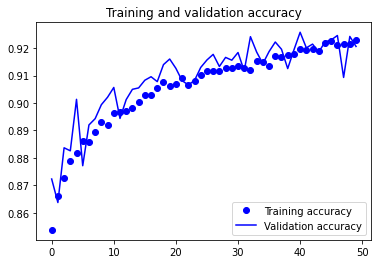

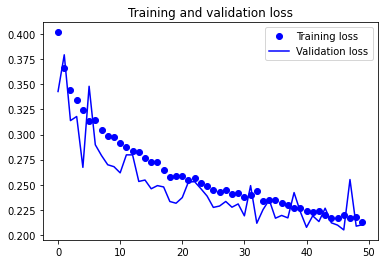

In [17]:

import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()